## Traffic Simulation Data Collection

In [1]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from road import Road

%matplotlib inline

In [2]:
from simulator import main
speed_limit, positions, speeds, mean_speeds, st_devs = main()

Our simulator puts out a suggested speed limit, a selection of car positions and car speeds at certain intervals, a list of the mean speed for every 60 second simulation, and a list of the standard deviation of car speeds for each 60 second simultion.

In [3]:
def arrange_data(sim_positions):
    position_matrix = []
    for sec_list in sim_positions:
        sec_list = np.ndarray.flatten(np.array(sec_list))
        position_matrix.append(sec_list)
    return position_matrix

positions_0_matrix = np.matrix(arrange_data(positions[0]))
positions_10_matrix = np.matrix(arrange_data(positions[1]))
positions_35_matrix = np.matrix(arrange_data(positions[2]))
positions_75_matrix = np.matrix(arrange_data(positions[3]))
positions_100_matrix = np.matrix(arrange_data(positions[4]))

Here the car position data is organized into a matrix for every point at which it was collected.

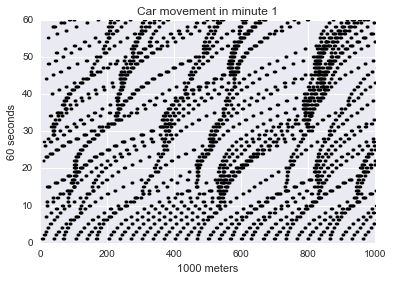

In [4]:
y = [[n] * 150 for n in range(1, 61)]
x = np.ndarray.flatten(positions_0_matrix)
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('1000 meters')
ax.set_ylabel('60 seconds')
ax.set_title('Car movement in minute 1')
plt.scatter(x, y, marker='s', color='k', s=3)
plt.show()

#### Car Movement in Minute 1
Each car starts evenly spaced at 0 seconds. There are many traffic jams as the cars slowly gain speed.

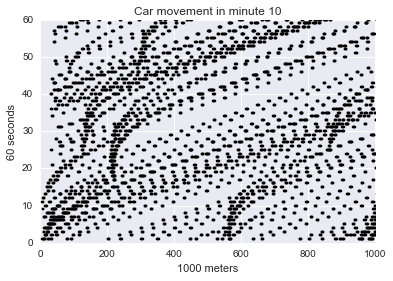

In [5]:
x = np.ndarray.flatten(positions_10_matrix)
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('1000 meters')
ax.set_ylabel('60 seconds')
ax.set_title('Car movement in minute 10')
plt.scatter(x, y, marker='s', color='k', s=3)
plt.show()

#### Car Movement in Minute 10
The cars run continuously around the 1000m track. You can see here the cars' movement from minutes 9 - 10 that the traffic jams are less frequent.

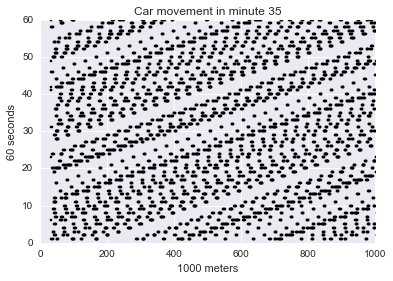

In [6]:
x = np.ndarray.flatten(positions_35_matrix)
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('1000 meters')
ax.set_ylabel('60 seconds')
ax.set_title('Car movement in minute 35')
plt.scatter(x, y, marker='s', color='k', s=3)
plt.show()

#### Car Movement in Minute 35
In our continuous simulation, not only do the cars jam less frequently over time, but they also resolve the traffic jams more quickly.

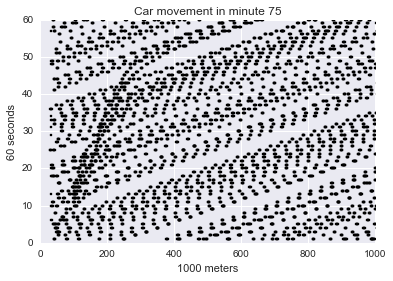

In [7]:
x = np.ndarray.flatten(positions_75_matrix)
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('1000 meters')
ax.set_ylabel('60 seconds')
ax.set_title('Car movement in minute 75')
plt.scatter(x, y, marker='s', color='k', s=3)
plt.show()

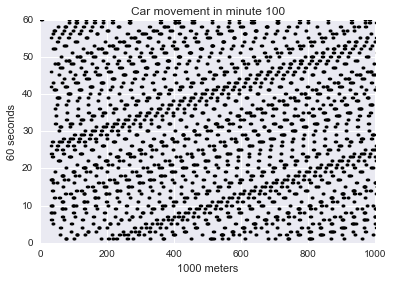

In [8]:
x = np.ndarray.flatten(positions_100_matrix)
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('1000 meters')
ax.set_ylabel('60 seconds')
ax.set_title('Car movement in minute 100')
plt.scatter(x, y, marker='s', color='k', s=3)
plt.show()

#### Car Movement in Minute 75 and 100
At this point, the cars are jamming infrequently, so in the last two selected simulations, little to no traffic jams occured. 

## Smooth Flow
If evenly spaced, the distance between the cars is is 33 m. Since the max speed limit is 33 m/s, it is fairly easy for each car to continue at max speed uninterrupted.

***

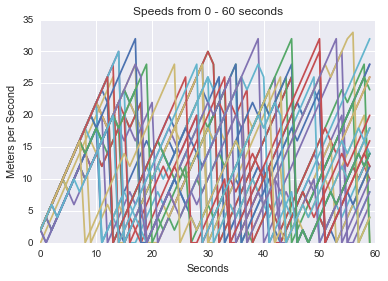

In [9]:
round_1 = np.reshape(np.array(speeds[0]), (60, 30))
plt.plot(round_1)
plt.xlabel('Seconds')
plt.ylabel('Meters per Second')
plt.title('Speeds from 0 - 60 seconds')
plt.show()

#### Speeds from 0 - 60 seconds
This graph shows the variance in speed for cars during the first minute of the simulation. You will notice sharp drops whenever a car slams on its breaks to avoid hitting the car in front of it.

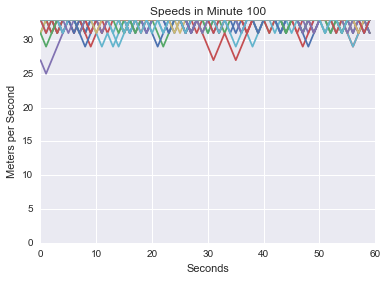

In [16]:
round_100 = np.reshape(np.array(speeds[4]), (60, 30))
plt.plot(round_100)
plt.axis([0.0, 60.0, 0.0, 33.0])
plt.xlabel('Seconds')
plt.ylabel('Meters per Second')
plt.title('Speeds in Minute 100')
plt.show()

#### Speeds from Minute 99 - Minute 100
In the final minute of the simulation you can see that no car decelerated below 20 m/s. There are no traffic jams and all of the cars are staying around their max speed.

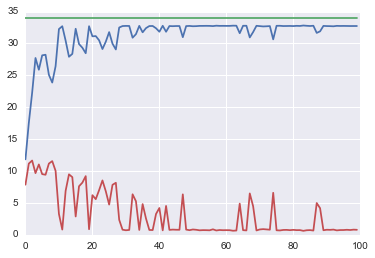

In [11]:
plt.plot(mean_speeds)
plt.plot(range(100), [speed_limit]*100)
plt.plot(st_devs)
plt.title('Mean Speeds')
plt.show()

#### Mean Speeds
This graph shows the mean speeds over 100 minutes of simulations in blue. The red line is the standard deviation of speed for each minute. The standard deviation gets smaller the more times we run the simulation. The suggested speed limit (calculated as mean speed + one standard deviation) is noted in green.

32.4289333333


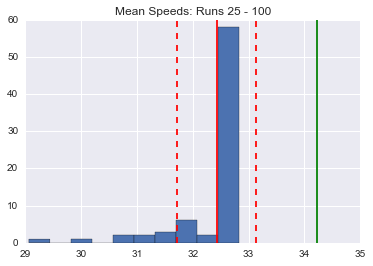

In [25]:
mean = np.mean(mean_speeds[25:])
stdev_1 = np.mean(st_devs[25:])
stdev = np.std(mean_speeds[25:])

plt.hist(mean_speeds[25:])
ymin, ymax = plt.ylim()
plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - stdev, mean + stdev], ymin, ymax, color='red', linestyles='dashed')
plt.vlines(mean + stdev_1, ymin, ymax, color='green')
plt.title('Mean Speeds: Runs 25 - 100')
plt.show()

### Mean Speed
We took the mean speed for the last 75 trials, excluding the insignificant data and traffic jams that occured while the stopped cars accelerated to a more consistent speed.

This histogram shows that most often, the mean speed was between 32 and 33. The plot includes the mean of this segment of mean speed data, and two calculations for standard deviation. The red dotted lines represent the standard deviaton of the list of 75 mean speeds. The green line is actually closer to our suggested speed limit (34). It is equal to the mean of all of the standard deviations collected during the 75 runds.

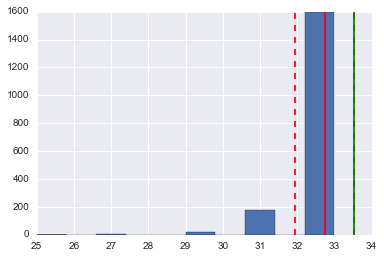

In [28]:
plt.hist(speeds[4])
mean = np.mean(speeds[4])
stdev = np.std(speeds[4])
ymin, ymax = plt.ylim()

plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - stdev, mean + stdev], ymin, ymax, color='red', linestyles='dashed')
plt.vlines([mean + stdev], ymin, ymax, color='green')
plt.title('Mean Speeds for run 100')
plt.show()

During the final run, in which all cars are up to speed and are unlikely to jam, the standard deviation is much smaller.

#### Why calculate with big data?

If we were to calculate the speed limit based solely on this final run, it would be lower than the figure calculated with more variant, traffic-jam-filled runs. The larger the data set, the more accurate the information.

### Speed Limit 34
In our simulation, the cars tend to run at their max speed most of the time. The standard deviation averages out to a significant number because of the variance caused by traffic jams and sudden stops. When the mean speed is increased by the standard deviation, our pro